# Setup

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.lib.display import YouTubeVideo

There's a couple of helper scripts `split_video`, `show_images` for splitting the video into individual frames, and to display images in rows and columns. <br>
You will need to clone the git repository https://github.com/rsomani95/shot-boundary-detection in order to access these

In [ ]:
#local imports

from split_frames import split_video
from plot_help    import show_images

In order to follow along with the code, you will need to download the YouTube video below as 'tdk-bankrobbery.mp4'

In [ ]:
YouTubeVideo('cyq7jrZz_HY')

In [ ]:
src_name = 'tdk-bankrobbery'

# Use PySceneDetect to extract delta HSL (delta) values from each frame and save to csv
!scenedetect -i {src_name}.mp4 -s {src_name}.csv detect-content list-scenes

In [ ]:
split_video(filename='tdk-bankrobbery.mp4', path='frames')

In [ ]:
path_frames = "./frames"

In [ ]:
# Read in the raw frame-by-frame data created by PySceneDetect
raw_data = pd.read_csv("tdk-bankrobbery-stats.csv", low_memory = False, skiprows = 1)
raw_data.head()


In [ ]:
# Read in the shot-list that PySceneDetect created. This is PySceneDetect's analysis of where the (hard) cut occurs.
shotlist_psd = pd.read_csv('tdk-bankrobbery-Scenes.csv', skiprows = 1)
shotlist_psd.head()

In [ ]:
# flatten list of lists into single list
flatten = lambda x: list(itertools.chain.from_iterable(x))

def get_surrounding_frames(frames, pre = 5, post = 5):
    return flatten([np.arange(frame-pre, frame+post+1) for frame in frames])

def view_surrounding_frames(frame, pre = 5, post = 5):
    frame_ = get_surrounding_frames(frame, pre, post)
    images = [imread(f'{path_frames}/frame{i}.jpg') for i in frame_]
    titles = [f'Frame {i}' for i in frame_]
    show_images(images, 4, titles)
    
def view_plot(frame, pre = 5, post = 5):
    frame_ = get_surrounding_frames(frame, pre, post)
    subset = raw_data[raw_data['Frame Number'].isin(frame_)]
    plt.figure(figsize = (8, 4))
    plt.xlabel('Frame Number')
    plt.ylabel('Average HSL Value')
    plt.bar(subset['Frame Number'], subset['content_val'])
    
def inspect_frame(frame, pre = 5, post = 5):
    print(f'Frame #{frame}')
    view_plot(frame, pre, post)
    view_surrounding_frames(frame, pre, post)
    

In [ ]:
psd_frames = shotlist_psd['Start Frame']

# Incorrectly Detected Cuts

1. #397
2. #1199
3. #1217
4. #2042
5. #2174
6. #2428
7. #3052
8. #3636
9. #4242
10. #5243
11. #5486
12. #5501
13. #6074
14. #6322

### Frame #397

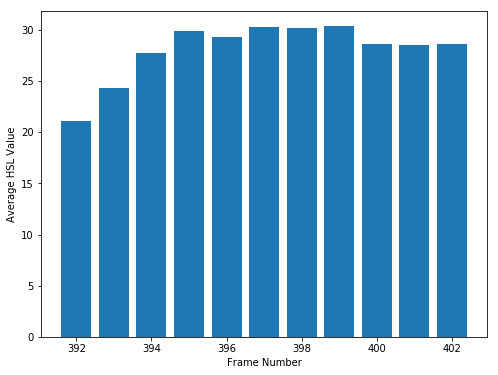

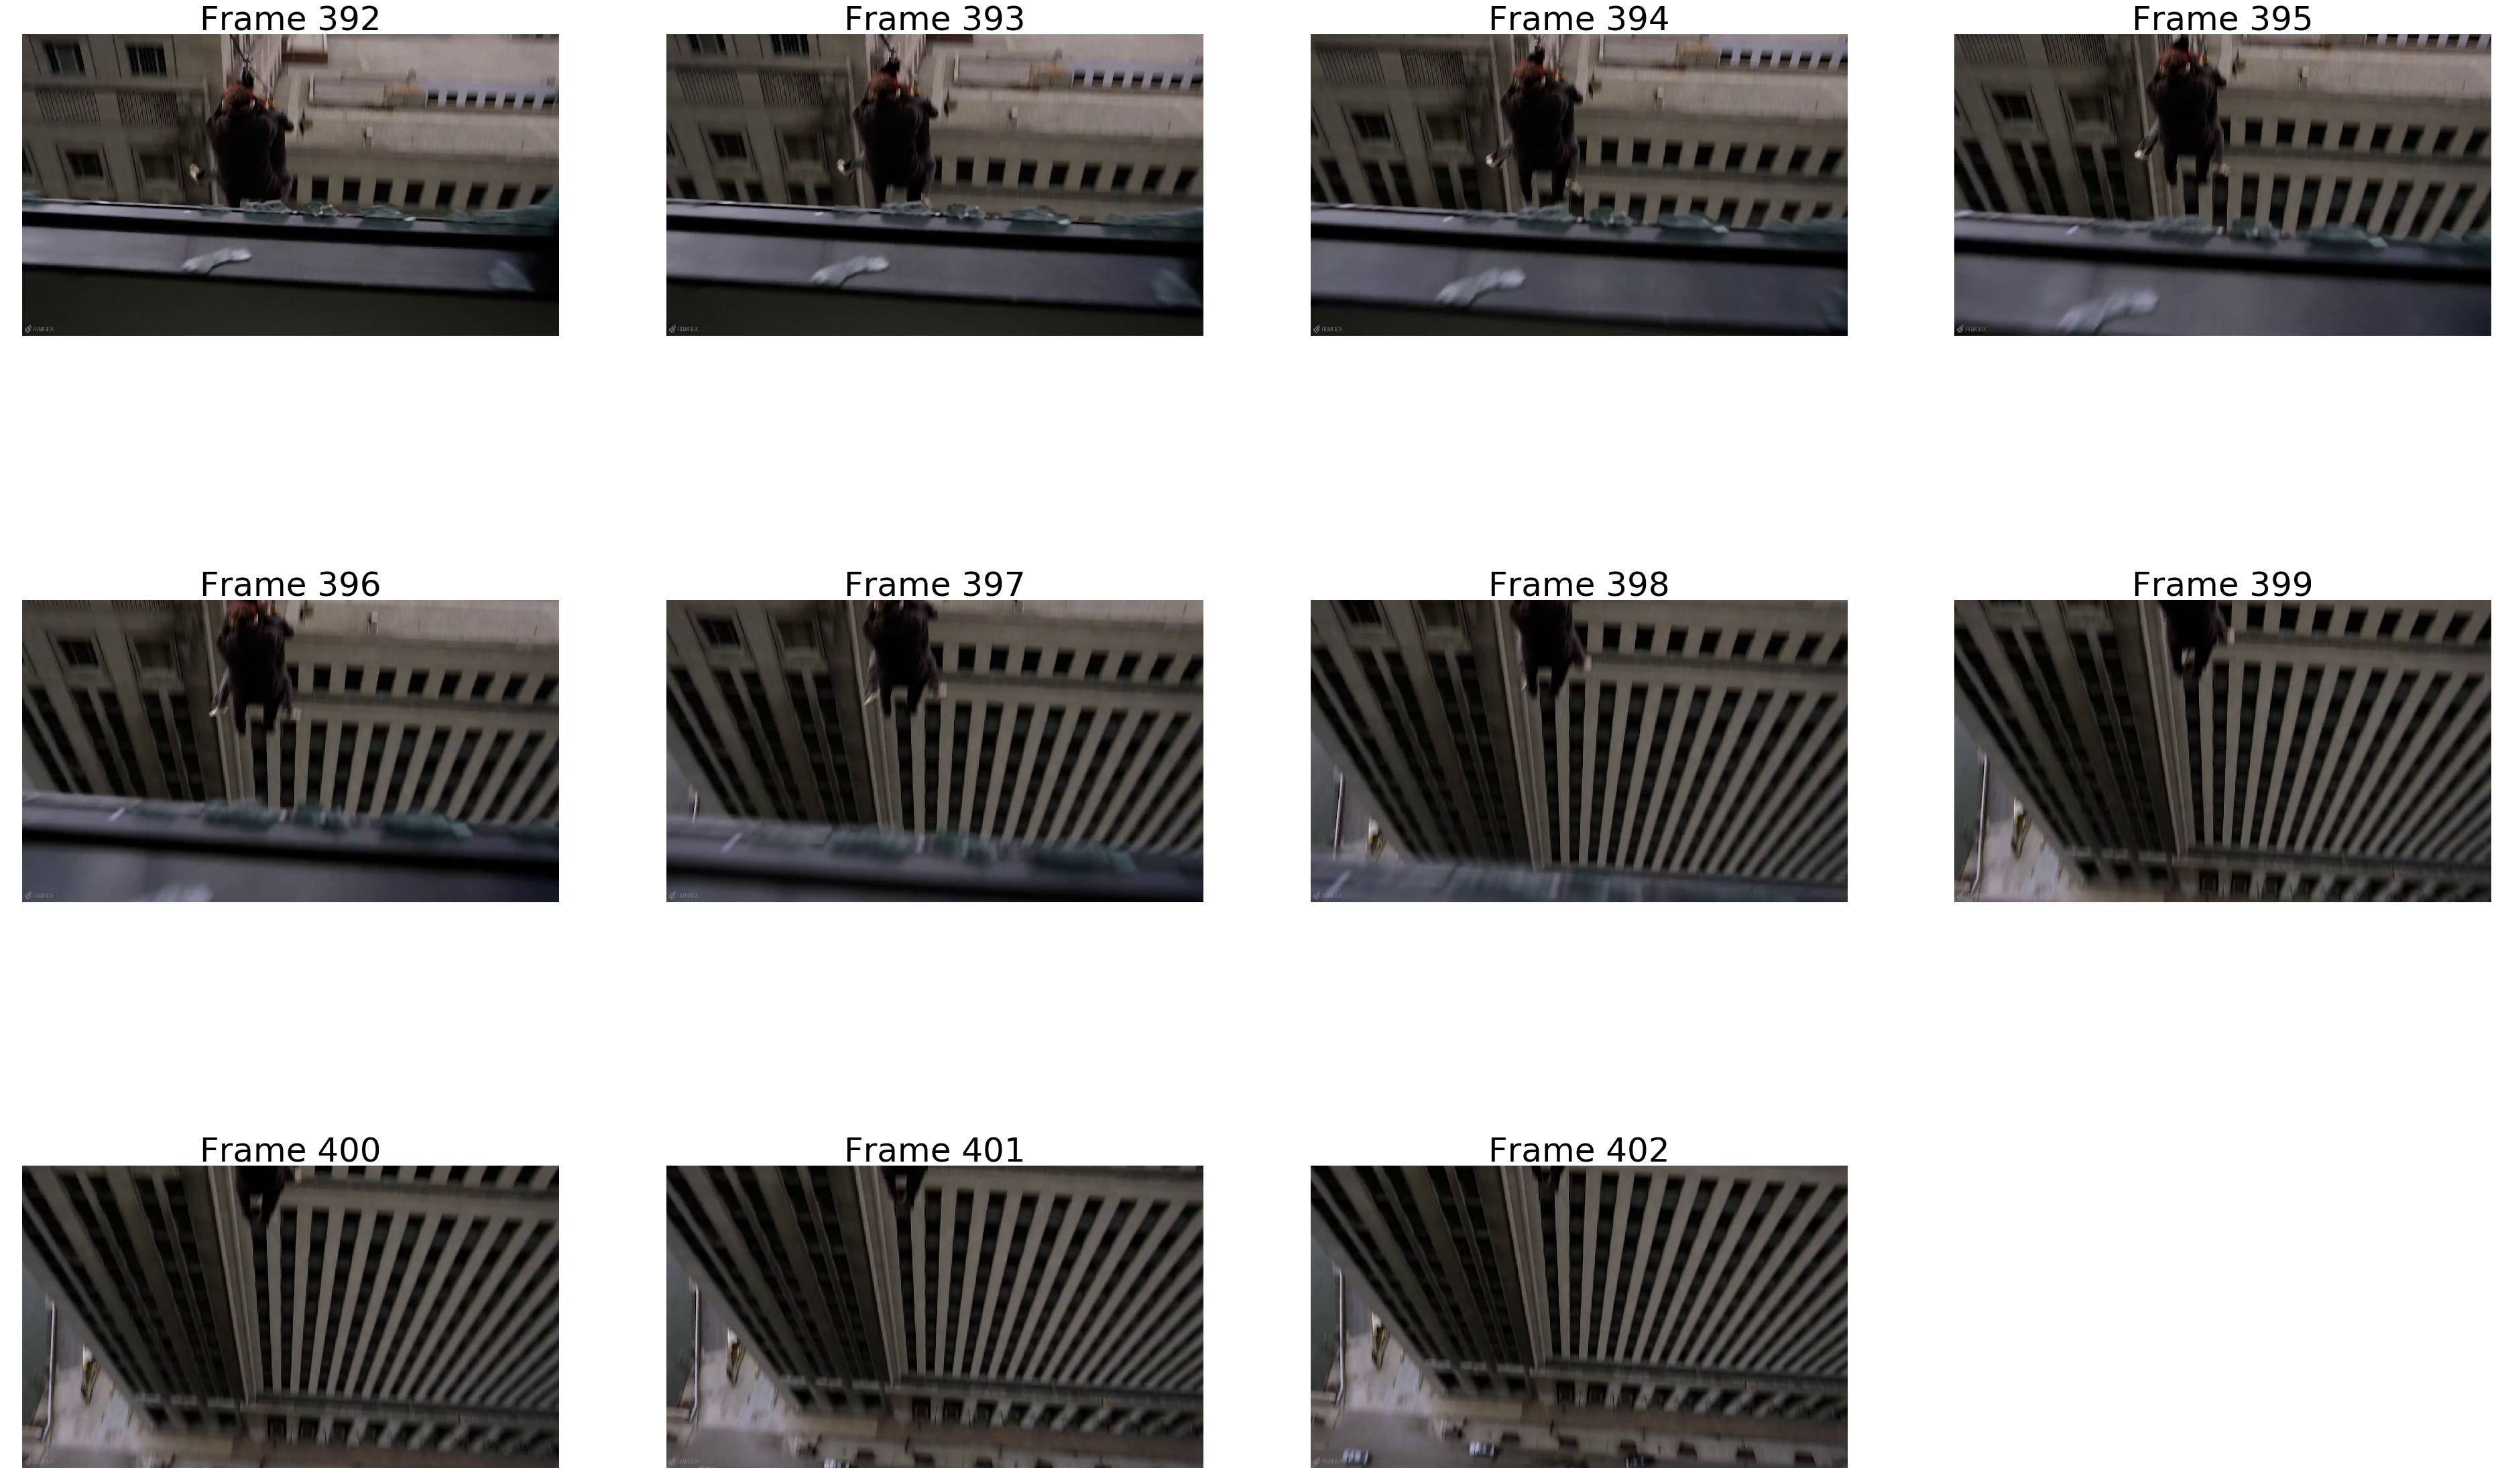

In [ ]:
inspect_frame([psd_frames[4]])

### Frame #1199

In [ ]:
inspect_frame([psd_frames[12]])

### Frame #1217

In [ ]:
inspect_frame([psd_frames[13]])

### Frame #2042

In [ ]:
inspect_frame([psd_frames[27]])

### Frame #2074

In [ ]:
inspect_frame([psd_frames[28]], 3, 9)

### Frame #2174

In [ ]:
inspect_frame([psd_frames[29]], 2, 15)

### Frame #2428

In [ ]:
inspect_frame([psd_frames[33]])

### Frame #3052

In [ ]:
inspect_frame([psd_frames[43]])

### Frame #3636

In [ ]:
inspect_frame([psd_frames[57]])

### Frame #4242

In [ ]:
inspect_frame([psd_frames[66]], 2, 15)

### Frame #5243

In [ ]:
inspect_frame([psd_frames[84]])

### Frame #5486

In [ ]:
inspect_frame([psd_frames[88]], 5, 5)

### Frame #5501

In [ ]:
inspect_frame([psd_frames[89]], 5, 5)

### Frame #6074

In [ ]:
inspect_frame([psd_frames[96]], 5, 5)

### Frame #6322

In [ ]:
inspect_frame([psd_frames[101]])

# Undetected Cuts

These cuts were probably not detected because they were very quick ones. There's a certain threshold for minimum no. of frames to occur after a cut has been detected before another cut can be detected

The cut at **Frame #3552** wasn't detected

In [ ]:
inspect_frame([psd_frames[53]], 1, 21)

The cut at **Frame #5108** wasn't detected

In [ ]:
inspect_frame([psd_frames[81]], 2, 15)